(sec-xgate)=
# XGate

This is one of the most important one-qubit gates.  Hence, this section covers its properties at depth.

[API References: XGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.XGate.html#qiskit.circuit.library.XGate)

## Definition

**Transformation**  

> $$
X |0\rangle = |1\rangle, \qquad X |1\rangle = |0\rangle
$$(XGate)

$X$ gate flips the computational basis, which resembles to the $NOT$ gate for classical computation.   However, when it acts on superposition states, the state does not flip (the Bloch vector does not inverted).

**Matrix expression**

>$$
X \doteq \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$(XGate-matrix)


**UGate expression**

>$$
X = U(\pi,0,\pi)
$$(XGate-U)

The qiskit circuit symbol is `x` and it appears in quantum circuit as

In [42]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘


---
**Qiskit Example** {numref}`%s <sec-xgate>`.1&nbsp;

We construct a short quantum circuit using two Xgates and check how the state vector is transformed.  The initial state is always $|0\rangle$.  The first Xgate flips it to $|1\rangle$ and the second Xgate flips it back to $|0\rangle$.


'Quantum circuit'

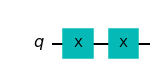

'State vector before the gate'

<IPython.core.display.Latex object>

'State vector after the first Xgate'

<IPython.core.display.Latex object>

'State vector after the second Xgate'

<IPython.core.display.Latex object>

In [4]:
# import QuatumCircuit and QuantumRegister classes.
from qiskit import QuantumCircuit, QuantumRegister

# import STatevector class
from qiskit.quantum_info import Statevector

# Preparation
qr=QuantumRegister(1,'q') # create a single qubit with name 'q'.
qc=QuantumCircuit(qr)  # create a quantum circuit

# Intial state
psi0 = Statevector(qc)

#  apply the first Xgate to 0-th qubit
qc.x(0)

# Intermediate state
psi1 = Statevector(qc)

#  apply the second Xgate to 0-th qubit
qc.x(0)

# Final state
psi2 = Statevector(qc)

# Format ket vector with LaTeX.
ket0 = psi0.draw('latex')
ket1 = psi1.draw('latex')
ket2 = psi2.draw('latex')

# Show the result using display function
from IPython.display import display, Math
display("Quantum circuit",qc.draw('mpl'),"State vector before the gate",
        ket0,"State vector after the first Xgate",ket1,
        "State vector after the second Xgate",ket2)

## Acting on a superposition state

When XGate is applied to a super position state the coefficient is swapped.  That is

>$$
X \left (c_0 |0\rangle + c_1 |1\rangle\right) = c_1 |0\rangle + c_0 |1\rangle
$$(X-on-superpos)



---
**Exercise** {numref}`%s <sec-xgate>`.1&nbsp;  Prove Eq. {eq}`X-on-superpos`.

---

**Qiskit Example** {numref}`%s <sec-xgate>`.1&nbsp; How do the following superposition states transformed by the Xgate?

$$
|L\rangle = \frac{1}{\sqrt{2}} \left (|0\rangle + i |1\rangle\right), \quad |R\rangle = \frac{1}{\sqrt{2}} \left (|0\rangle - i |1\rangle\right)
$$

Using the general result {eq}`X-on-superpos`, we find

$$
X |L\rangle = \frac{1}{\sqrt{2}} \left (i |0\rangle + |1\rangle\right) = i |R\rangle, \quad
X |R\rangle = \frac{1}{\sqrt{2}} \left (-i |0\rangle + |1\rangle\right) = -i |L\rangle
$$

Recalling that the global phase factor can be ignored, we conclude that

$$
X |L\rangle \simeq |R\rangle, \quad
X |R\rangle \simeq |L\rangle.
$$

The following Qiskit code demonstrates that mathematically $X|L\rangle = i |R\rangle$ but $X|L\rangle$ \simeq |R\rangle$ when plotted in the Bloch sphere.

In [11]:
# import QuatumCircuit and QuantumRegister classes.
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.opflow import Zero, One

# import STatevector class
from qiskit.quantum_info import Statevector

# import numpy
import numpy as np


L=(Zero+1j*One)/np.sqrt(2)
R=(Zero-1j*One)/np.sqrt(2)

# Preparation
qr=QuantumRegister(1,'q') # create a single qubit with name 'q'.
qc=QuantumCircuit(qr)  # create a quantum circuit

# set the qubit to |L> 
qc.initialize(L.to_matrix())

# apply Xgate
qc.x(0)

# Final state
final=Statevector(qc)

# Show that the final state is not exactly the same as |R>
final.draw('latex')


<IPython.core.display.Latex object>

'Original |R>'

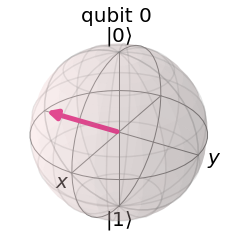

'X|L>'

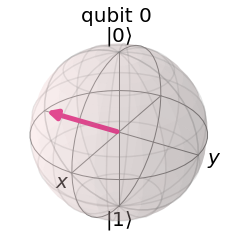

In [24]:
# Compare the final state with |R> in Bloch sphere.
from qiskit.visualization import plot_bloch_multivector

# Generate Bloch vectors
R_bloch = plot_bloch_multivector(R)
final_bloch = plot_bloch_multivector(final)

from IPython.display import display

# Compare X|L> and |R>.  They are equivalent in the Bloch sphere.
display("Original |R>",R_bloch,"X|L>",final_bloch)


---
**Exercise** {numref}`%s <sec-xgate>`.2&nbsp;  Show that $X|+\rangle = |+\rangle$ and $X|-\rangle = -|-\rangle$.  This means that $X$ does not change $|\pm\rangle$ except for the phase factor.

---

## Important Properties

> $X^2 = I$

This means that
1.  $X^2$ does not do any thing on the qubit.
2.  $X$ is  self-inverse, that is $X^{-1} = X$.
3.  $X$ is self-adjoint ($X^\dagger = X$) since $X$ is unitary ($X^\dagger = X^{-1}$) by definition.

Property 1 was deomnstrated in Qiskit Example {numref}`%s <sec-xgate>`.1.


---
Last modified: 07/09/2022